In [298]:
import matplotlib.pyplot as plt
import numpy as np

In [17]:
test = """
noop
addx 3
addx -5
""".strip()

test2 = """
addx 15
addx -11
addx 6
addx -3
addx 5
addx -1
addx -8
addx 13
addx 4
noop
addx -1
addx 5
addx -1
addx 5
addx -1
addx 5
addx -1
addx 5
addx -1
addx -35
addx 1
addx 24
addx -19
addx 1
addx 16
addx -11
noop
noop
addx 21
addx -15
noop
noop
addx -3
addx 9
addx 1
addx -3
addx 8
addx 1
addx 5
noop
noop
noop
noop
noop
addx -36
noop
addx 1
addx 7
noop
noop
noop
addx 2
addx 6
noop
noop
noop
noop
noop
addx 1
noop
noop
addx 7
addx 1
noop
addx -13
addx 13
addx 7
noop
addx 1
addx -33
noop
noop
noop
addx 2
noop
noop
noop
addx 8
noop
addx -1
addx 2
addx 1
noop
addx 17
addx -9
addx 1
addx 1
addx -3
addx 11
noop
noop
addx 1
noop
addx 1
noop
noop
addx -13
addx -19
addx 1
addx 3
addx 26
addx -30
addx 12
addx -1
addx 3
addx 1
noop
noop
noop
addx -9
addx 18
addx 1
addx 2
noop
noop
addx 9
noop
noop
noop
addx -1
addx 2
addx -37
addx 1
addx 3
noop
addx 15
addx -21
addx 22
addx -6
addx 1
noop
addx 2
addx 1
noop
addx -10
noop
noop
addx 20
addx 1
addx 2
addx 2
addx -6
addx -11
noop
noop
noop
""".strip()

In [43]:
with open('input.txt', 'r') as f:
    input_ = f.read().strip()

# Part 1

In [202]:
def sync(commands):
    synced = []
    for idx, cmd in enumerate(commands):
        if cmd[0] == 'noop':
            synced.append(('noop', 0))
        if cmd[0] == 'addx':
            synced.append(('noop', 0))
            synced.append(cmd)
    return synced

def execute(synced):
    X_hist = [[] for _ in range(len(synced))]
    X = 1
    for idx, cmd in enumerate(synced):
        X += int(cmd[1])
        # idx + 2 : cycles start counting at 1, and this is at the end of the cycle
        X_hist[idx] = (idx + 2, X)
    return X_hist

In [243]:
commands = [line.split() for line in test.splitlines()]
signal = execute(sync(commands))
signal

[(2, 1), (3, 1), (4, 4), (5, 4), (6, -1)]

In [254]:
commands = [line.split() for line in test2.splitlines()]
signal = np.array(execute(sync(commands)))
s = signal[18::40]
(s[:, 0] * s[:,1]).sum()

13140

In [255]:
commands = [line.split() for line in input_.splitlines()]
signal = np.array(execute(sync(commands)))
s = signal[18::40]
(s[:, 0] * s[:,1]).sum()

14820

# Part 2

In [296]:
def crt_display(signal, width, height=6):
    crt = np.zeros((height, width), dtype=int)
    for idx, center in signal:
        line = (idx-1) // 40
        pos = (idx-1) % 40
        if pos in [center-1, center, center+1]:
            crt[line, pos] = 1
    return crt

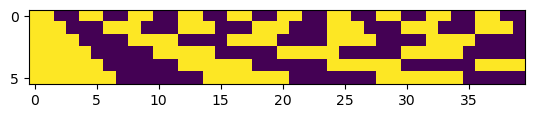

In [299]:
commands = [line.split() for line in test2.splitlines()]
signal = execute(sync(commands))
signal.insert(0, [1, 1])
plt.imshow(crt_display(signal[:-1], 40, 6))

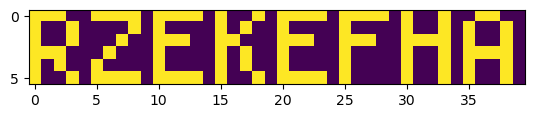

In [300]:
commands = [line.split() for line in input_.splitlines()]
signal = execute(sync(commands))
signal.insert(0, [1, 1])
plt.imshow(crt_display(signal[:-1], 40, 6))

In [ ]:
# RZEKEFHA